# Variogram estimation

This notebook is used to implement your own variogram estimation algorithm.


In [ ]:
!pip install scikit-gstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 708.3/708.3 kB 9.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load data

This chapter loads the data and transforms it into a CRS using meter as unit

In [ ]:
from pathlib import Path

PATH = Path('/content/drive/MyDrive/Geostatistics/content/data')

In [ ]:
import pandas as pd

data = pd.read_csv(PATH / 'precipitation_sums_2023-10-01.csv')
data

In [ ]:
import pyproj

# create a transform and apply
src = pyproj.CRS.from_epsg(4326)
tgt = pyproj.CRS.from_epsg(25832)
transform = pyproj.Transformer.from_crs(src, tgt, always_xy=True)
tuples = transform.transform(data.longitude.values, data.latitude.values)

# create the coordinates and values list
coordinates = list(zip(*tuples))
values = data.value.values.tolist()

## Calculate the lag classes and groups

You could also use your solution from the last exercise (Pairs.ipynb).
Here, we simply use scikit-gstat to do that step for us.

In [ ]:
import skgstat as skg

vario = skg.Variogram(coordinates, values, n_lags=50, maxlag='median')
fig = vario.distance_difference_plot()

In [ ]:
# You can get the distances through the distance property
print(vario.distance)

# and the pair-wise observation residuals through ._diff
print(vario._diff)

# and finally also the lag-class indices are also available through a function
print(vario.lag_groups())

## Task 6.1

Before we head to the empirical variogram, we need to implement the estimator functions. They will receive a list of observation residuals.


In [ ]:
import numpy as np

def matheron(obs_pairs) -> float:
  x = np.asarray(obs_pairs)

  # implement your solution here
  return 42

def cressie(obs_pairs) -> float:
  x = np.asarray(obs_pairs)

  # implement your solution here
  return 42


In [ ]:
# here we create a random sample and test our function against the skgstat estimator
np.random.seed(42)

pairs = np.random.normal(10, 2, size=400)

# test
assert skg.estimators.matheron(pairs) - matheron(pairs) < 0.01
assert skg.estimators.cressie(pairs) - cressie(pairs) < 0.01

## Task 6.2

With an estimator function in place, we can go ahead and extract the pair-wise observation residuals for each lag class, one at a time and and pass them into the function. This way we calculate the semi-variance and end up with the experimental values.

In [ ]:
# create a container for matheron and cressie semi-variance
experimental_matheron = []
experimental_cressie = []

# the number of lags is also accessible
for class_index in range(vario.n_lags):
  # get all differences at the current group index

  # implement your solution here
  pairs = [42, 84]

  # calculate the semi-variance
  experimental_matheron.append(matheron(pairs))
  experimental_cressie.append(cressie(pairs))

In [ ]:
# we can test this as well
from numpy.testing import assert_array_almost_equal

assert_array_almost_equal(vario.experimental, experimental_matheron)

In [ ]:
# and plot it
import matplotlib.pyplot as plt

plt.plot(vario.bins, experimental_matheron, '.b', label='Matheron')
plt.plot(vario.bins, experimental_cressie, '.r', label='Cressie-Hawkins')
plt.legend()

## Task 6.3

For Task 6.3 we want to compare different processings for the geostatistical dataset. We can limit the maximum lag distance, the number of lag classes and test different spatial resolutions of the empirical variogram

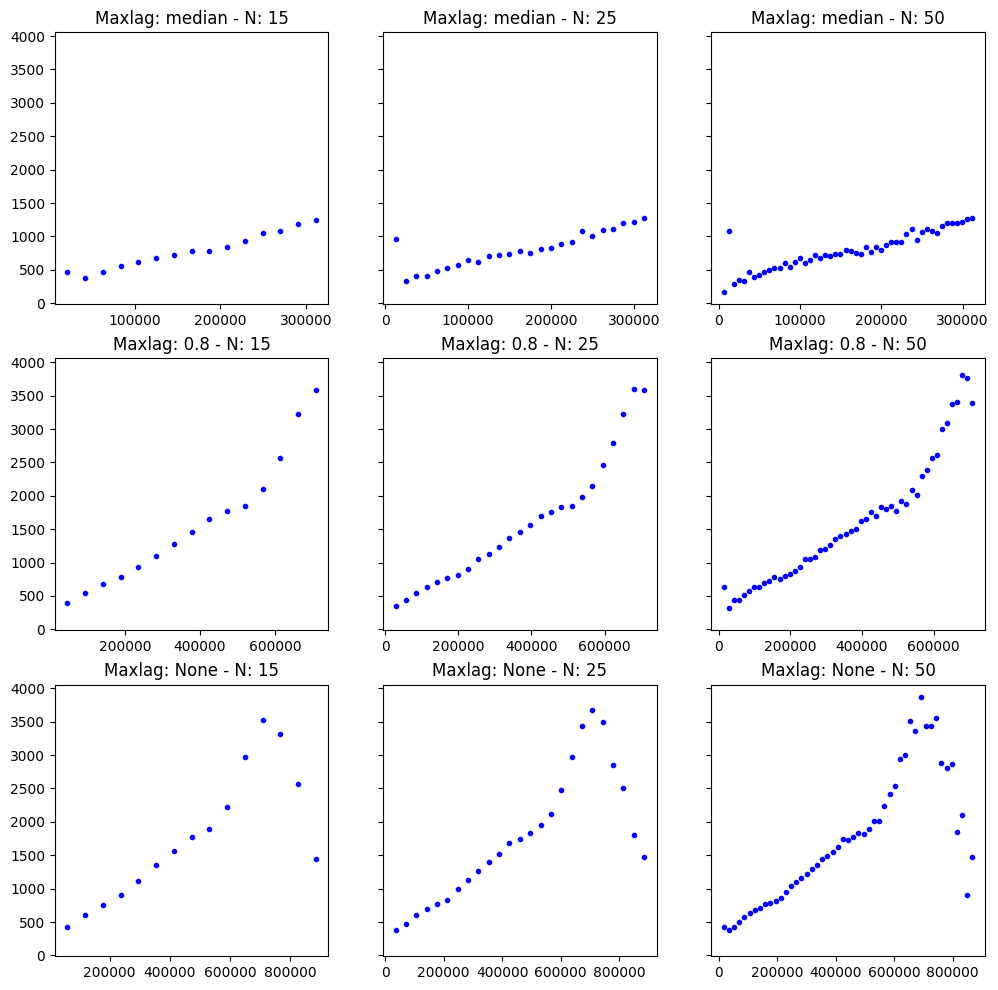

In [ ]:
# ok try to go ahead and implement something on your own here from scratch
# could look like the graph below